In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Hcomplex(z):# computes the hue corresponding to the complex number z
    H = np.angle(z) / (2*np.pi) + 1
    return np.mod(H, 1)


In [30]:
def G(r,r_prime,phi, omega_0):
    dot =  np.einsum("ijk,i->jk",r, r_prime)
    if np.abs(np.exp(phi) - 1) < 1e-8 or np.abs(np.exp(phi) + 1) < 1e-8:
        return 0.0
    elif np.abs(np.exp(phi) - 1j) < 1e-8 or np.abs(np.exp(phi) + 1j) < 1e-8:
        print(f"Confocal part only {phi=:.2f}  {np.sinh(phi)=:.2f}")
        return np.exp(phi)/(2*np.pi*np.sinh(phi)) * np.exp(2*dot/(omega_0**2*np.sinh(phi)))
    else:
        print(f"Full green's function {phi=:.2f} {np.exp(phi)=:.2f}")
        return np.exp(phi)/(2*np.pi*np.sinh(phi)) * np.exp(-(np.square(np.linalg.norm(r, axis=0)) + np.square(np.linalg.norm(r_prime, axis=0)))/(omega_0**2*np.tanh(phi)) + 2*dot/(omega_0**2*np.sinh(phi)))

def G_eta(r,r_prime,phi, omega_0, N, eta):
    sumOfG = np.zeros((r.shape[1],r.shape[2]), dtype=np.complex128)
    for s in range(N):
        sumOfG += np.exp(-2j*np.pi*s*eta/N)*G(r, r_prime, phi-2j*np.pi*s/N, omega_0)
    return sumOfG/N

def G_script(r, r_prime, omega_0, epsilon, kappa):
    return 0.0

Full green's function phi=0.00-0.90j np.exp(phi)=0.62-0.78j
Full green's function phi=0.00-1.80j np.exp(phi)=-0.22-0.97j
Full green's function phi=0.00-2.69j np.exp(phi)=-0.90-0.43j
Full green's function phi=0.00-3.59j np.exp(phi)=-0.90+0.43j
Full green's function phi=0.00-4.49j np.exp(phi)=-0.22+0.97j
Full green's function phi=0.00-5.39j np.exp(phi)=0.62+0.78j
Full green's function phi=0.00-1.80j np.exp(phi)=-0.22-0.97j
Full green's function phi=0.00-2.69j np.exp(phi)=-0.90-0.43j
Full green's function phi=0.00-3.59j np.exp(phi)=-0.90+0.43j
Full green's function phi=0.00-4.49j np.exp(phi)=-0.22+0.97j
Full green's function phi=0.00-5.39j np.exp(phi)=0.62+0.78j
Full green's function phi=0.00-7.18j np.exp(phi)=0.62-0.78j
Full green's function phi=0.00+1.80j np.exp(phi)=-0.22+0.97j
Full green's function phi=0.00+0.90j np.exp(phi)=0.62+0.78j
Full green's function phi=0.00-0.90j np.exp(phi)=0.62-0.78j
Full green's function phi=0.00-1.80j np.exp(phi)=-0.22-0.97j
Full green's function phi=0.00

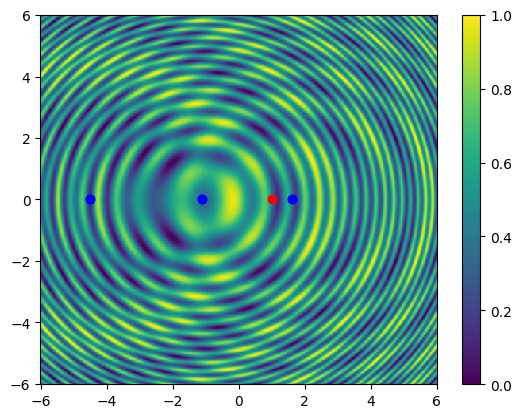

In [49]:
x = np.linspace(-6.0, 6.0, 500)
y = np.linspace(-6.0, 6.0, 500)
X,Y = np.meshgrid(x,y)
R = np.array([X,Y])

M = 4
N = 7
eta = 0

E = G_eta(R, [1., 0.0], 0., 1.0, N, eta) + G_eta(R, [1., 0.0], -1j*M*np.pi/N, 1.0, N, eta) + G_eta(R, [1., 0.0], 1j*M*np.pi/N, 1.0, N, eta)
# E = G(R, [1.0,0.0], -1j*np.pi/2, 1.0)

plt.pcolor(X, Y, np.real(E))
plt.scatter(1,0,color='red')
plt.scatter(1/np.cos(np.pi*M/N), 0, color='blue')
plt.scatter(1/np.cos(2*np.pi*M/N), 0, color='blue')
plt.scatter(1/np.cos(3*np.pi*M/N), 0, color='blue')
plt.scatter(1/np.cos(4*np.pi*M/N), 0, color='blue')
plt.scatter(1/np.cos(5*np.pi*M/N), 0, color='blue')
plt.scatter(1/np.cos(6*np.pi*M/N), 0, color='blue')
plt.colorbar()
plt.show()

In [35]:
np.argmax(E)

48249

In [38]:
E[48249//500, 48249%500]

(0.5295752017567117-8.299567630376536e-16j)

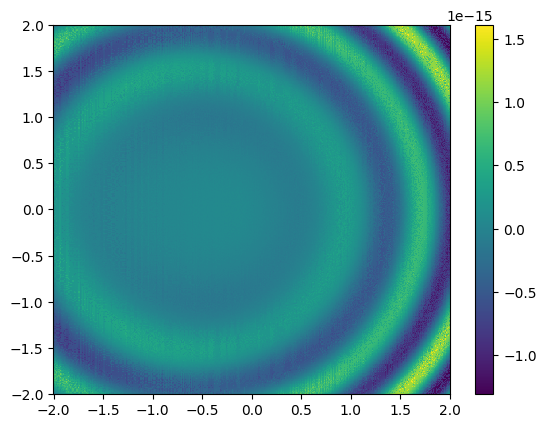

In [25]:
plt.pcolor(X, Y, np.imag(E))
plt.colorbar()

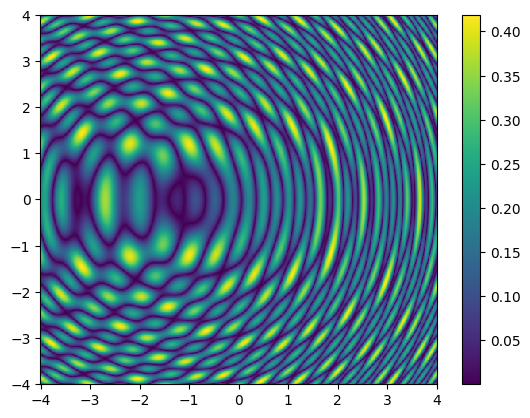

In [30]:
plt.pcolor(X, Y, np.abs(E))
plt.colorbar()

In [9]:
def findJijForPoints(listOfPoints, omega_0, M, N, eta):
    num_points = listOfPoints.shape[1]
    J = np.zeros((num_points,num_points))
    for i in range(num_points):
        J[i,:] = np.real(G_eta(np.array([[listOfPoints[0]], [listOfPoints[1]]]),listOfPoints[:,i], -1j*M*np.pi/N, omega_0, N, eta))

    return J

In [10]:
def generateGaussianPointsList(num_of_points, width, center=(0,0)):
    xCoords = np.random.normal(center[0], width, num_of_points)
    yCoords = np.random.normal(center[1], width, num_of_points)
    return np.array([xCoords, yCoords])

C:\Users\henhen724\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\histograms.py:852: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
C:\Users\henhen724\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\transforms.py:775: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


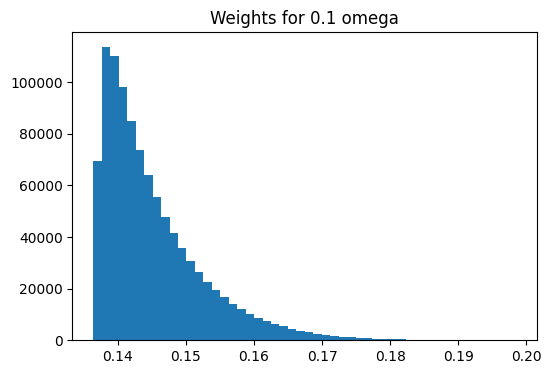

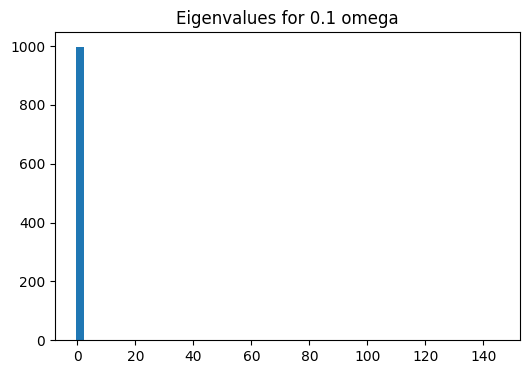

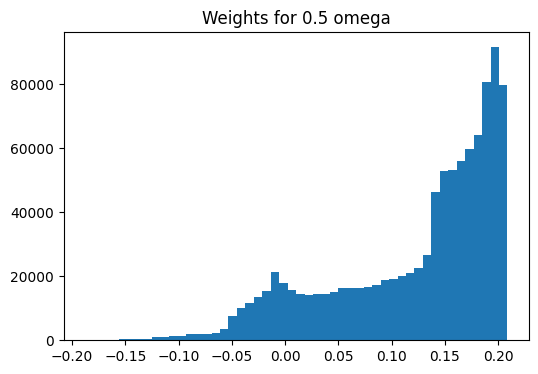

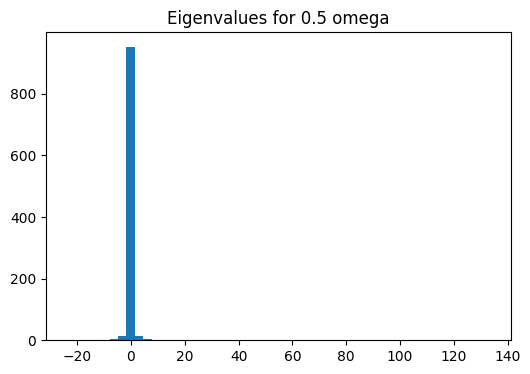

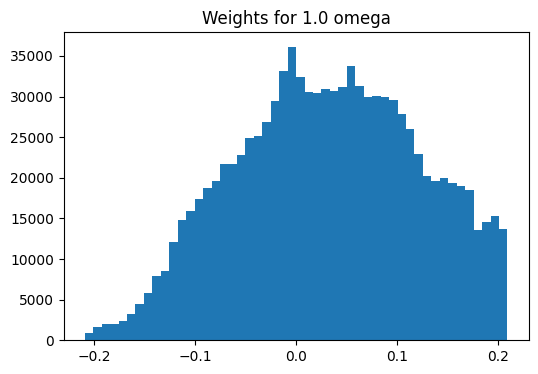

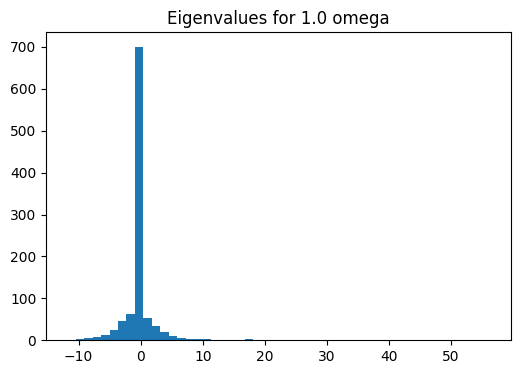

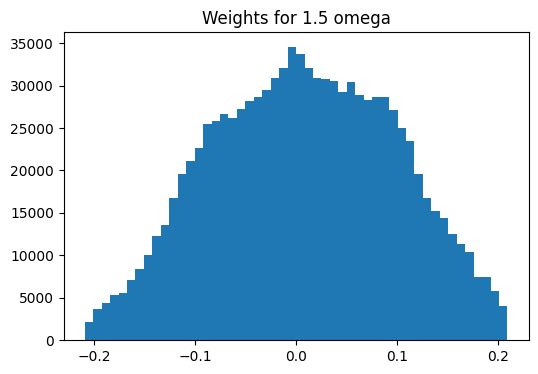

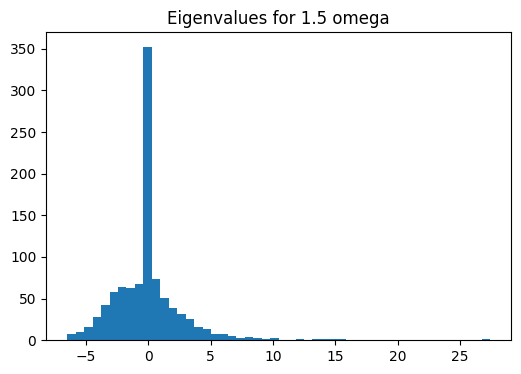

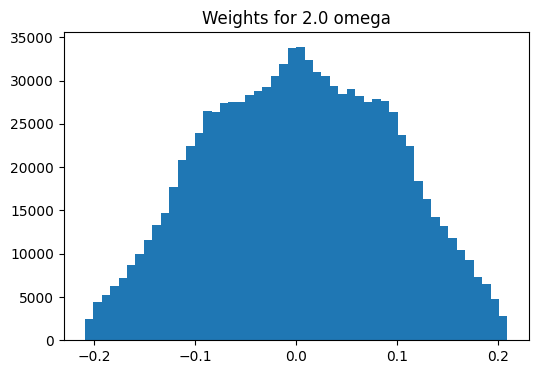

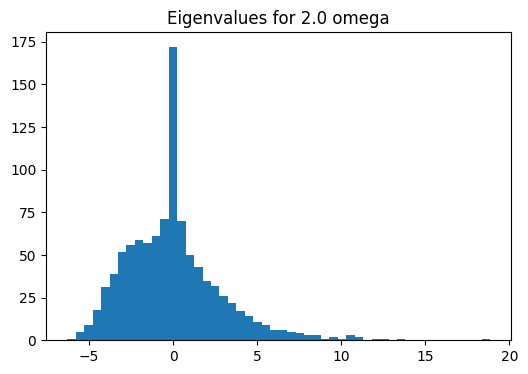

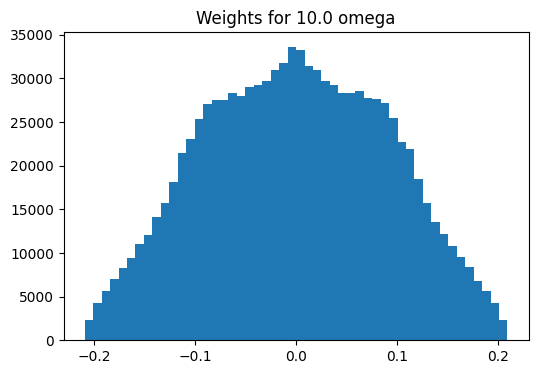

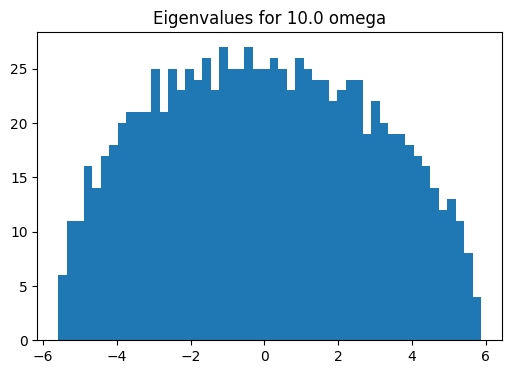

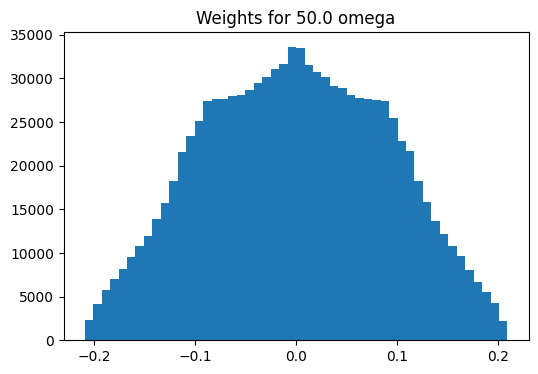

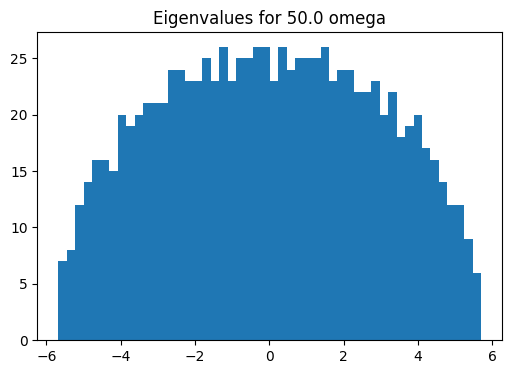

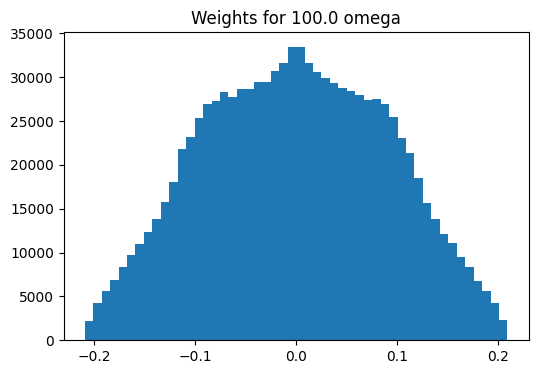

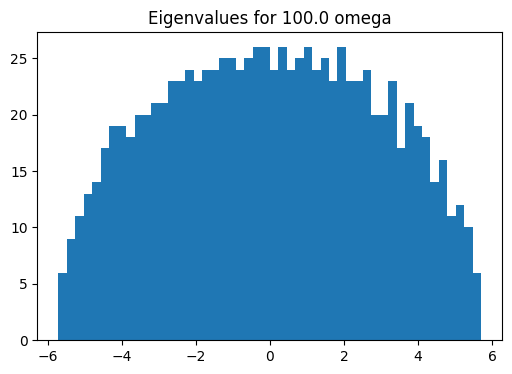

In [31]:
for width in [0.1, 0.5, 1.0, 1.5, 2.0, 10.0, 50.0, 100.0]:
    points = generateGaussianPointsList(1000, width)
    J = findJijForPoints(points, 1.0, 4, 7, 0)
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.hist(J.reshape(1000000), bins=50)
    ax.set_title(f"Weights for {width} omega")
    fig.savefig(f"weights{width}.png")
    fig, ax = plt.subplots(figsize=(6, 4))
    plt.hist(np.linalg.eigvals(J),bins=50)
    ax.set_title(f"Eigenvalues for {width} omega")
    fig.savefig(f"eigenvals{width}.png")

phi=-0.8975979010256552j
phi=-1.7951958020513104j
phi=-2.6927937030769655j
phi=-3.5903916041026207j
phi=-4.487989505128276j
phi=-5.385587406153931j
phi=0.8975979010256552j
phi=-0.8975979010256552j
phi=-1.7951958020513104j
phi=-2.6927937030769655j
phi=-3.5903916041026207j
phi=-4.487989505128276j


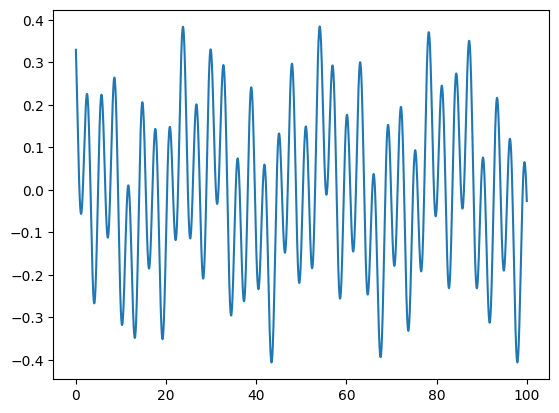

In [35]:
y_squared = np.linspace(0.0, 100.0, 2000)
R = np.array([[np.zeros(2000)],[np.sqrt(y_squared)]])

M = 2
N = 7
eta = 0

E_prime = G_eta(R, [1.0, 0.0], -1j*M*np.pi/N, 1.0, N, eta) + G_eta(R, [1.0, 0.0], 1j*M*np.pi/N, 1.0, N, eta)
plt.plot(y_squared, np.real(E_prime[0]))

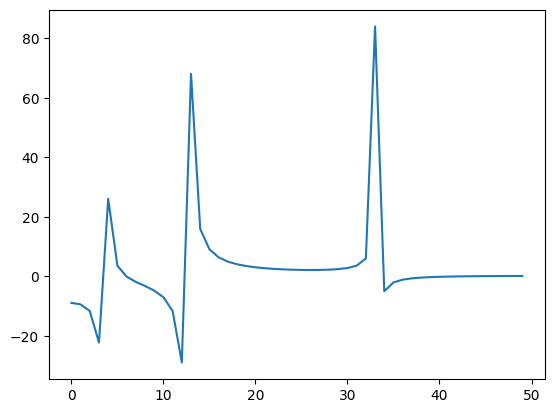

In [39]:
from scipy.fftpack import fftfreq


E_for = np.fft.rfft(E_prime[0])
plt.plot(E_for[0:50])